In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [41]:
plt.rcParams['figure.figsize'] = (9, 6)

## Covariance

$$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$$

In [42]:
def covariance(X):
    X = X - X.mean(axis=0)
    X = (X.T @ X) / (len(X)-1)
    return X

In [43]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=7, size=1000)
X = np.vstack((x, y)).T

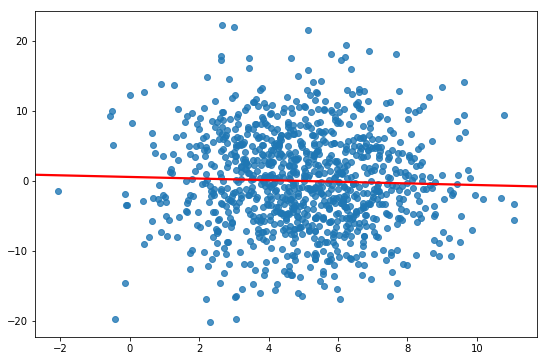

In [44]:
line_kws = {'color':'red'}
sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [45]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np_cov == cov

Covariance matrix from numpy

[[ 4.16257763 -0.47961364]
 [-0.47961364 49.58965317]]


Our covariance matrix

[[ 4.16257763 -0.47961364]
 [-0.47961364 49.58965317]]




array([[ True,  True],
       [ True,  True]])

Normally the covariancd matrix doesn't tell us much but is an intermediate step to calculating the correlation matrix.

<hr>

## Correlation

$$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

In [46]:
def correlation(X):
    cov = covariance(X)
    std = X.std(axis=0, ddof=1).reshape(-1, 1) @ X.std(axis=0, ddof=1).reshape(1, -1)
    
    return cov / std

### Generating uncorrelated data

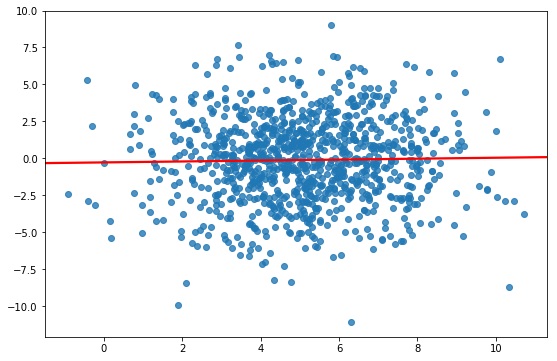

In [47]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)

X = np.vstack((x, y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws=line_kws);

In [48]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np_cov == cov

Covariance matrix from numpy

[[3.63791322 0.1147746 ]
 [0.1147746  8.38862206]]


Our covariance matrix

[[3.63791322 0.1147746 ]
 [0.1147746  8.38862206]]




array([[ True,  True],
       [ True, False]])

### Generating correlated data

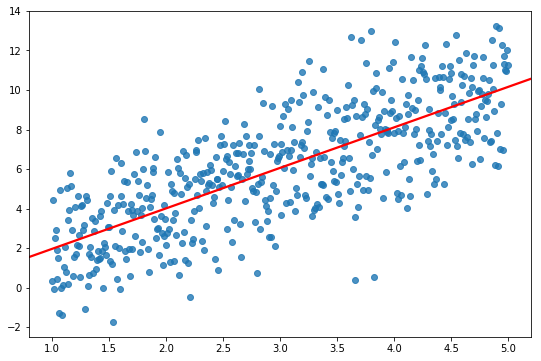

In [49]:
x = np.linspace(1, 5, 500)
y = 2 * x + np.random.normal(scale=2, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [50]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[1.34136007 2.74798091]
 [2.74798091 9.83059067]]


Our covariance matrix

[[1.34136007 2.74798091]
 [2.74798091 9.83059067]]




array([[ True,  True],
       [ True,  True]])

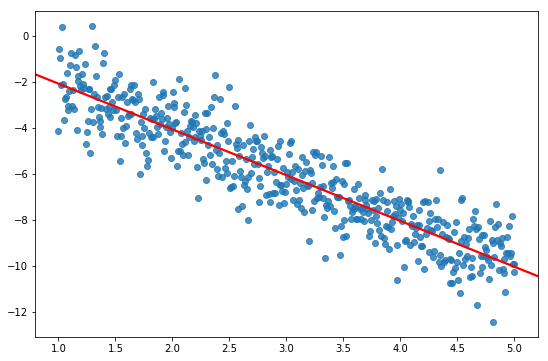

In [51]:
x = np.linspace(1, 5, 500)
y = -2 * x + np.random.normal(scale=1, size=500)
X = np.vstack((x,y)).T

sns.regplot(X[:,0], X[:,1], ci=None, line_kws={'color':'red'});

In [52]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[ 1.34136007 -2.67461396]
 [-2.67461396  6.38914305]]


Our covariance matrix

[[ 1.34136007 -2.67461396]
 [-2.67461396  6.38914305]]




array([[ True,  True],
       [ True,  True]])

### Correlation for a 4 feature matrix

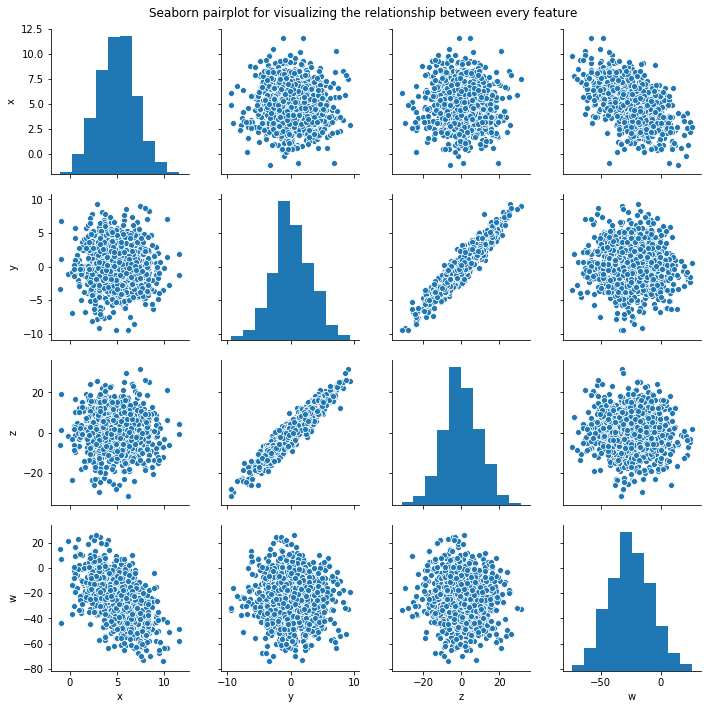

In [53]:
x = np.random.normal(loc=5, scale=2, size=1000)
y = np.random.normal(loc=0, scale=3, size=1000)
z = 3 * y + np.random.normal(scale=3, size=1000)
w = -5 * x + np.random.normal(scale=15, size=1000)

X = np.vstack((x, y, z, w)).T
df_X = pd.DataFrame(X, columns=['x', 'y', 'z', 'w'])

sns.pairplot(df_X)
plt.suptitle('Seaborn pairplot for visualizing the relationship between every feature')
plt.subplots_adjust(top=0.95)

In [54]:
print('Covariance matrix from numpy\n')
np_cov = np.cov(X, rowvar=False)
print(np_cov)
print('\n=================================\n')
print('Our covariance matrix\n')
cov = covariance(X)
print(cov)
print('\n=================================\n')
np.isclose(np_cov, cov)

Covariance matrix from numpy

[[ 3.90662375e+00 -1.21844865e-01 -5.72580362e-01 -1.87267228e+01]
 [-1.21844865e-01  9.30798239e+00  2.77622305e+01 -1.83565106e+00]
 [-5.72580362e-01  2.77622305e+01  9.21663903e+01 -3.63378347e+00]
 [-1.87267228e+01 -1.83565106e+00 -3.63378347e+00  3.08656220e+02]]


Our covariance matrix

[[ 3.90662375e+00 -1.21844865e-01 -5.72580362e-01 -1.87267228e+01]
 [-1.21844865e-01  9.30798239e+00  2.77622305e+01 -1.83565106e+00]
 [-5.72580362e-01  2.77622305e+01  9.21663903e+01 -3.63378347e+00]
 [-1.87267228e+01 -1.83565106e+00 -3.63378347e+00  3.08656220e+02]]




array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## Visualizing the correlation matrix


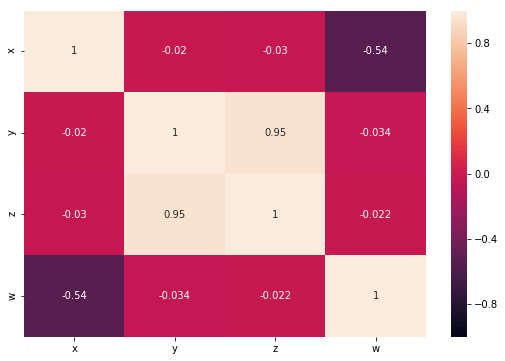

In [55]:
sns.heatmap(df_X.corr(), linewidths=0, vmin=-1, vmax=1, annot=True);